In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data.csv")
df['Date'] = pd.to_datetime(df['Timestamp'])

In [3]:
# 1.Spatial aggregation

In [4]:
# Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?
df_new = df.groupby("state")["PM2.5"].mean()
print(df_new.idxmax())

Delhi


In [37]:
# Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?
mask1 = df["PM2.5"]>300 
mask2 = df["Date"].dt.year == 2023
df_new = df[(mask1) & (mask2)]
df_new_haz = df_new.groupby("state")["station"].nunique()
print(df_new_haz.idxmax())

Delhi


In [6]:
# Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)
df_new = df[df["Date"].dt.year == 2023].groupby("state")["PM2.5"].std()
print(df_new.idxmax())

Delhi


In [7]:
# Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?
df_new = df[(df["Date"].dt.year == 2020) | (df["Date"].dt.year == 2021)].groupby("state")["PM2.5"].mean()
print(df_new.idxmin())

Mizoram


In [8]:
# 2.Temporal Aggregation

In [9]:
# Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.
df_new = df[(df["Date"].dt.year == 2020) & (df["Date"].dt.month == 8)]
max_pm = df_new["PM2.5"].idxmax()
print(df_new.loc[max_pm , "station"])

Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB


In [10]:
# For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon:
# June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.
# [Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?
df_new = (df[(df["Date"].dt.year == 2018) & (df["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")])
df_new_win = df_new[(df_new["Date"].dt.month == 12) | (df_new["Date"].dt.month == 1) | (df_new["Date"].dt.month == 2)]
df_new_sum = df_new[(df_new["Date"].dt.month > 2) & (df_new["Date"].dt.month < 6)]
df_new_mon = df_new[(df_new["Date"].dt.month > 5) & (df_new["Date"].dt.month < 10)]

avg_pm_win = df_new_win["PM2.5"].mean()
avg_pm_sum = df_new_sum["PM2.5"].mean()
avg_pm_mon = df_new_mon["PM2.5"].mean()

print("Average PM2.5 concentration for Winter:", avg_pm_win)
print("Average PM2.5 concentration for Summer:", avg_pm_sum)
print("Average PM2.5 concentration for Monsoon:", avg_pm_mon)

Average PM2.5 concentration for Winter: 67.4923443634478
Average PM2.5 concentration for Summer: nan
Average PM2.5 concentration for Monsoon: 34.42519611317571


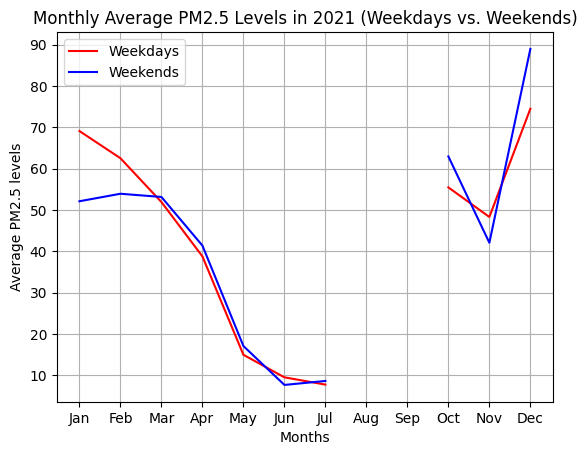

In [11]:
# Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021.
# Create a plot to show these trends Steps:
# Calculate the monthly average PM2.5 for weekdays and weekends separately
# X-axis: Months (January to December).
# Y-axis: Average PM2.5 levels.
# Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.
df_new = (df[(df["Date"].dt.year == 2021) & (df["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")]).copy()
df_new["Days"] = df_new["Date"].dt.weekday
df_new["Month"] = df_new["Date"].dt.month
df_weekday = df_new[df_new["Days"]<5]
df_weekend = df_new[df_new["Days"]>4]
mon_avg_weekday = df_weekday.groupby("Month")["PM2.5"].mean()
mon_avg_weekend = df_weekend.groupby("Month")["PM2.5"].mean()
plt.plot(mon_avg_weekday.index , mon_avg_weekday , color = "r" , label = "Weekdays")
plt.plot(mon_avg_weekend.index , mon_avg_weekend , color = "b" , label = "Weekends")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("Months")
plt.ylabel("Average PM2.5 levels")
plt.title("Monthly Average PM2.5 Levels in 2021 (Weekdays vs. Weekends)")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# 3.Spatio-temporal aggregation

In [13]:
# For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to 
# summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?
df_new = df[df["Date"].dt.year == 2022]
df_mon = (df_new[(df_new["Date"].dt.month > 5) & (df_new["Date"].dt.month < 10)]).groupby("state")["PM2.5"].mean()
df_sum = (df_new[(df_new["Date"].dt.month > 2) & (df_new["Date"].dt.month < 6)]).groupby("state")["PM2.5"].mean()
per_change = ((df_mon - df_sum) / df_sum) * 100
max_affected = per_change.abs().idxmax()
print(per_change.reset_index())
print("Maximum affected state:",max_affected)

                state      PM2.5
0      Andhra Pradesh -35.756894
1   Arunachal Pradesh -53.077110
2               Assam -61.176419
3               Bihar -53.000042
4          Chandigarh -45.124242
5        Chhattisgarh -10.975330
6               Delhi -55.293579
7             Gujarat -44.937747
8             Haryana -48.704688
9    Himachal Pradesh -37.067008
10  Jammu and Kashmir  -0.003063
11          Jharkhand        NaN
12          Karnataka -50.498558
13             Kerala -14.760499
14     Madhya Pradesh -56.251607
15        Maharashtra -52.706658
16            Manipur -48.441524
17          Meghalaya -48.546662
18            Mizoram -59.027533
19           Nagaland -56.249827
20             Odisha  -6.712991
21         Puducherry -22.623792
22             Punjab -37.033255
23          Rajasthan -46.594606
24             Sikkim -51.805275
25         Tamil Nadu -17.987205
26          Telangana -50.160366
27            Tripura -56.657734
28      Uttar Pradesh -52.979157
29        

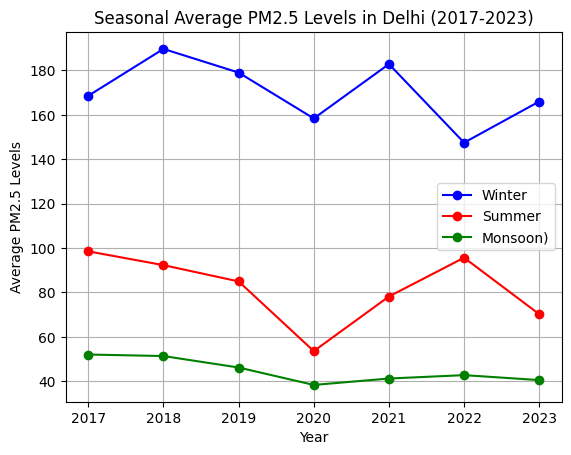

In [14]:
# Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, 
# Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?
df_new = df[(df["Date"].dt.year.between(2017,2023)) & (df["state"] == "Delhi")]

df_win = (df_new[(df_new["Date"].dt.month == 12) | (df_new["Date"].dt.month.between(1,2))]).groupby(df_new["Date"].dt.year)["PM2.5"].mean()
df_sum = (df_new[df_new["Date"].dt.month.between(3,5)]).groupby(df_new["Date"].dt.year)["PM2.5"].mean()
df_mon = (df_new[df_new["Date"].dt.month.between(6,9)]).groupby(df_new["Date"].dt.year)["PM2.5"].mean()
plt.plot(df_win.index, df_win, marker='o', label="Winter", color='blue')
plt.plot(df_sum.index, df_sum, marker='o', label="Summer", color='red')
plt.plot(df_mon.index, df_mon, marker='o', label="Monsoon)", color='green')
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels")
plt.title("Seasonal Average PM2.5 Levels in Delhi (2017-2023)")
plt.legend()
plt.grid(True)
plt.show()
# PM2.5 levels in Delhi are highest in winter (December-February), 
# moderate in summer (March-May), and 
# lowest during the monsoon (June-September).

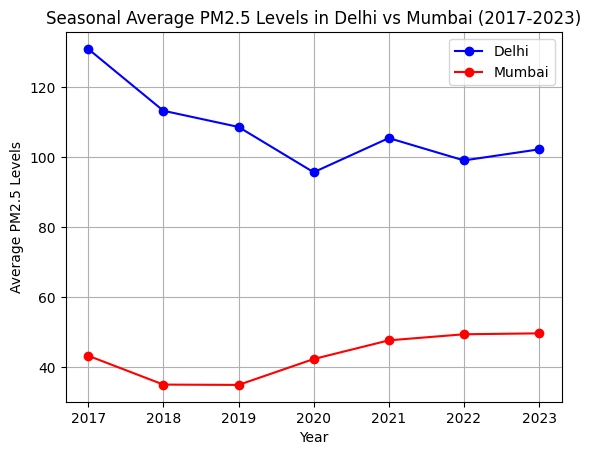

Delhi has more fluctuautions


In [15]:
# Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2017 to 2023. Which city had more fluctuations?
df_delhi = (df[(df["Date"].dt.year.between(2017,2023)) & (df["city"] == "Delhi")]).groupby(df["Date"].dt.year)["PM2.5"].mean()
df_mumbai = (df[(df["Date"].dt.year.between(2017,2023)) & (df["city"] == "Mumbai")]).groupby(df["Date"].dt.year)["PM2.5"].mean()
plt.plot(df_delhi.index, df_delhi, marker='o', label="Delhi", color='blue')
plt.plot(df_mumbai.index, df_mumbai, marker='o', label="Mumbai", color='red')
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels")
plt.title("Seasonal Average PM2.5 Levels in Delhi vs Mumbai (2017-2023)")
plt.legend()
plt.grid(True)
plt.show()
delhi_std = (df[(df["Date"].dt.year.between(2017,2023)) & (df["city"] == "Delhi")]).groupby(df["Date"].dt.year)["PM2.5"].std().mean()
mumbai_std = (df[(df["Date"].dt.year.between(2017,2023)) & (df["city"] == "Mumbai")]).groupby(df["Date"].dt.year)["PM2.5"].std().mean()
print("Delhi has more fluctuautions" if delhi_std > mumbai_std else "Mumbai has more fluctuautions")

In [16]:
# 4.Population-Based
df_p = pd.read_csv("State_data.csv")
df_p = df_p.rename(columns={'State': 'state'})

In [17]:
# Which state in India has the highest number of monitoring stations relative to its population?
station_count = df.groupby("state")["station"].nunique().reset_index()
final_df = pd.merge(df_p,station_count,on="state" , how = "inner")
final_df['No.of_stations_relative_to_population'] = final_df['station'] / final_df['Population']
max_stations_state = final_df["state"].iloc[final_df['No.of_stations_relative_to_population'].idxmax()]
print("The state with the highest number of monitoring stations relative to its population is" , max_stations_state)

The state with the highest number of monitoring stations relative to its population is Chandigarh


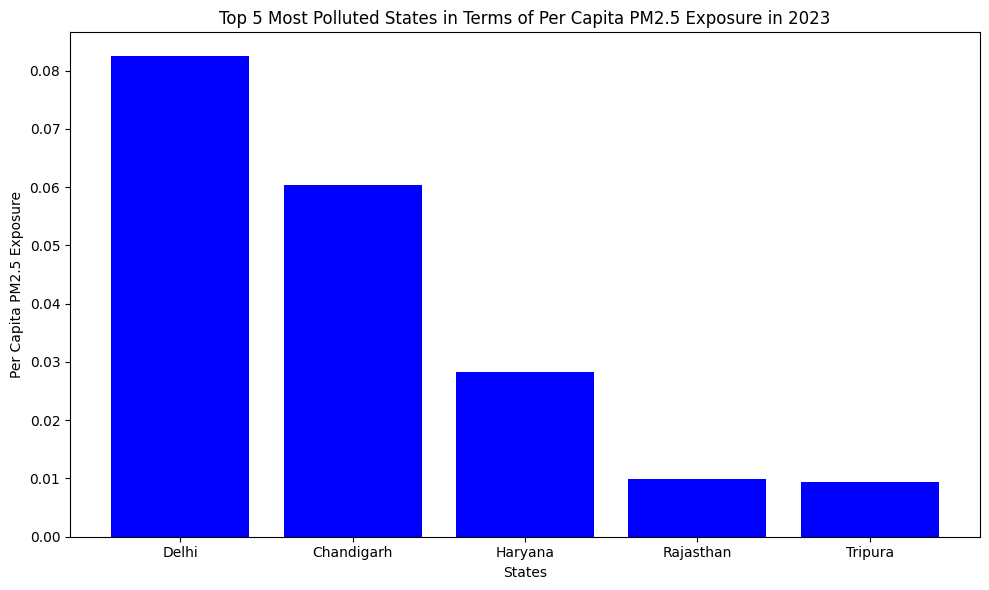

In [18]:
# Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.
df_2023 = df[df["Date"].dt.year == 2023]
state_pm25 = df_2023.groupby("state")["PM2.5"].sum().reset_index()
final_df = pd.merge(state_pm25, df_p, on="state" , how = "inner")
final_df["Per_Capita_PM2.5"] = final_df["PM2.5"] / final_df["Population"]
top_5_states = final_df.sort_values("Per_Capita_PM2.5", ascending=False).head(5)
plt.figure(figsize=(10, 6))
plt.bar(top_5_states["state"], top_5_states["Per_Capita_PM2.5"], color="blue")
plt.xlabel("States")
plt.ylabel("Per Capita PM2.5 Exposure")
plt.title("Top 5 Most Polluted States in Terms of Per Capita PM2.5 Exposure in 2023")
plt.tight_layout()
plt.show()

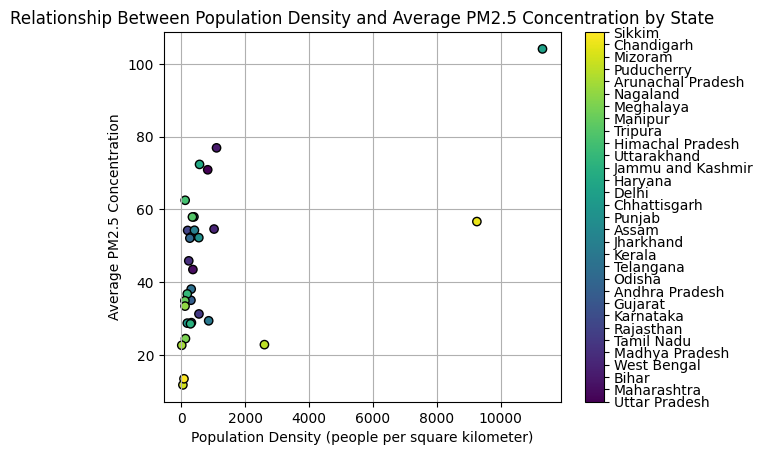

In [19]:
# Plot the relationship between population density and average PM2.5 concentration for each state. 
# What conclusion can you draw about the correlation between population density and pollution?
# X-axis: Population density (people per square kilometer).
# Y-axis: Average PM2.5 concentration.
# Use a scatter plot to show the relationship, where each point represents a state.
df_p_new = df_p.copy()
df_p_new["Population_Density"] = df_p_new["Population"] / df_p_new["Area (km2)"]
state_pm25 = df.groupby("state")["PM2.5"].mean()
final_df = pd.merge(df_p_new, state_pm25, on="state" , how = "inner")
scatter = plt.scatter(final_df["Population_Density"], final_df["PM2.5"], c=range(len(final_df)), cmap="viridis", edgecolors="black")
plt.xlabel("Population Density (people per square kilometer)")
plt.ylabel("Average PM2.5 Concentration")
plt.title("Relationship Between Population Density and Average PM2.5 Concentration by State")
plt.grid(True)
cbar = plt.colorbar(scatter)
cbar.set_ticks(range(len(final_df["state"])))
cbar.set_ticklabels(final_df["state"])
plt.show()

In [20]:
# 5.Area Based

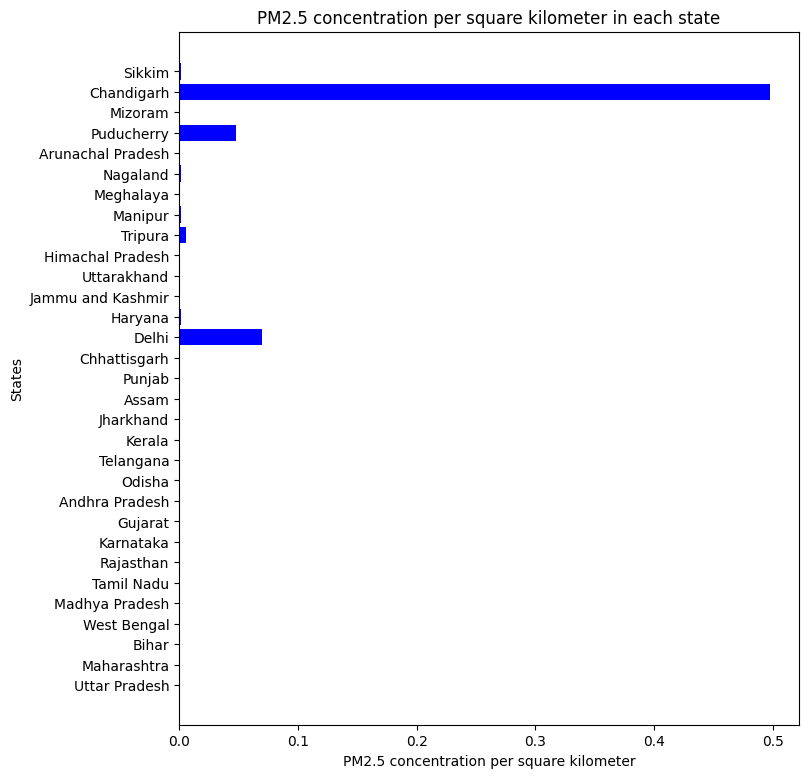

In [21]:
# Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
# X-axis: States.
# Y-axis: PM2.5 concentration per square kilometer.
# Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.
state_pm25 = df.groupby("state")["PM2.5"].mean().reset_index()
final_df = pd.merge(df_p, state_pm25, on="state" , how = "inner")
final_df["PM2.5_persqkm"] = final_df["PM2.5"]/final_df["Area (km2)"]
plt.figure(figsize=(8,9))
plt.barh(final_df["state"], final_df["PM2.5_persqkm"], color="blue")
plt.ylabel("States")
plt.xlabel("PM2.5 concentration per square kilometer")
plt.title("PM2.5 concentration per square kilometer in each state")
plt.show()

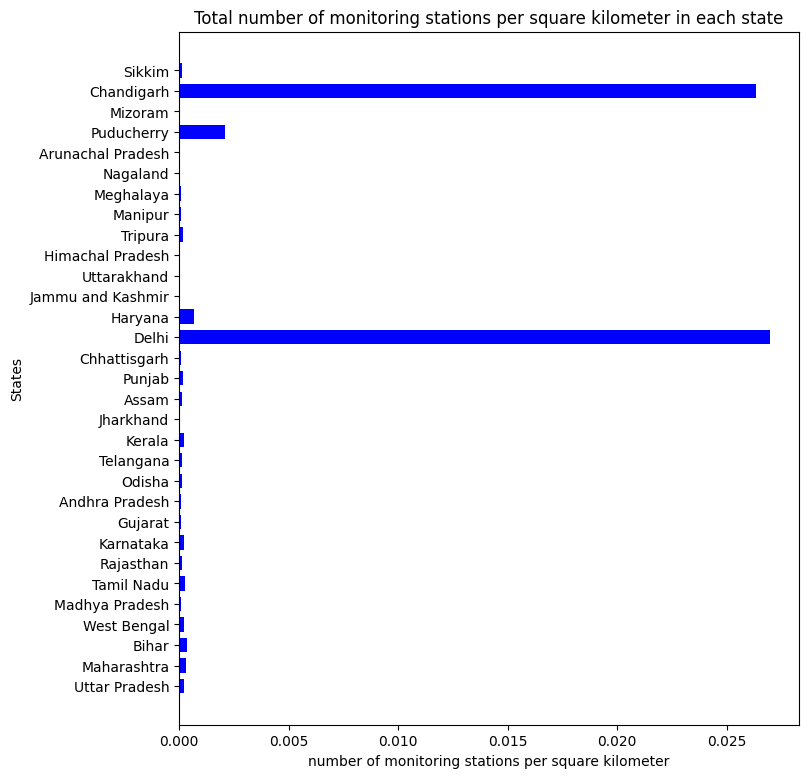

In [22]:
# Compare the total number of monitoring stations per square kilometer in each state. 
# Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state,
# and the height shows the number of monitoring stations per square kilometer.
station_count = df.groupby("state")["station"].nunique().reset_index()
final_df = pd.merge(df_p, station_count, on="state" , how = "inner")
final_df["Station_persqkm"] = final_df["station"]/final_df["Area (km2)"]
plt.figure(figsize=(8,9))
plt.barh(final_df["state"], final_df["Station_persqkm"], color="blue" , height = 0.7 )
plt.ylabel("States")
plt.xlabel("number of monitoring stations per square kilometer")
plt.title("Total number of monitoring stations per square kilometer in each state")

plt.show()

In [23]:
# Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. 
# Given that both states have similar area sizes but different population densities, 
# analyze how population density impacts pollution levels in these two states.
df_new = df[df["Date"].dt.year == 2021]
df_state = df_new.groupby("state")["PM2.5"].mean()
df_comp = df_state.loc[["Maharashtra" , "Madhya Pradesh"]]
print(df_comp.reset_index(),"\n")
df_p_copy = df_p.copy()
df_p_copy["Population_density"] = df_p_copy["Population"]/df_p_copy["Area (km2)"]
df_p_copy = df_p_copy.groupby("state")["Population_density"].mean()
df_p_comp = df_p_copy.loc[["Maharashtra" , "Madhya Pradesh"]]
print(df_p_comp.reset_index())
# In Maharashtara population density is more, still average PM2.5 levels are less as compared to Madhya Pradesh

            state      PM2.5
0     Maharashtra  46.440044
1  Madhya Pradesh  47.095952 

            state  Population_density
0     Maharashtra          365.192023
1  Madhya Pradesh          235.608557


In [24]:
# Funding Based
df_f = pd.read_csv("NCAP_Funding.csv")
df_f = df_f.rename(columns={'State': 'state'})

In [38]:
# Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.
df_fund = df_f.copy()
df_ = df[df["Date"].dt.year == 2021]
df_fund["Funding_in_2021"] = (df_fund["Amount released during FY 2021-22"] != "-")
df_fund_state = df_fund.groupby("state")["Funding_in_2021"].sum().reset_index()
state_pm25 = df_.groupby("state")["PM2.5"].mean().reset_index()
final_df = pd.merge(df_fund_state, state_pm25, on="state" , how = "inner")
final_df["Funding_Receieved"] = final_df["Funding_in_2021"].apply(lambda x: "Received" if x != 0 else "Not Received")
Fund_Received = final_df.groupby("Funding_Receieved")["PM2.5"].mean().reset_index()
Fund_Received

,Funding_Receieved,PM2.5
0,Not Received,48.401992
1,Received,49.251559


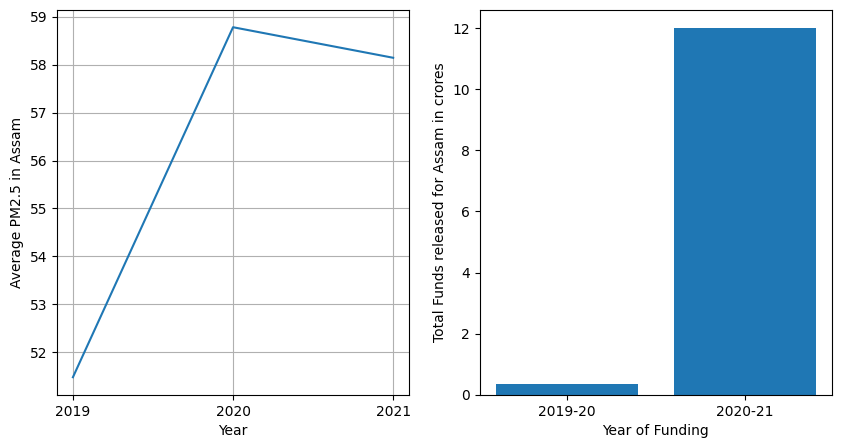

In [30]:
# Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. 
# Has an increment of the financing led to noticeable improvements in air quality?
data=pd.read_csv('Data.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'],errors='coerce',dayfirst=True)
funding = pd.read_csv("NCAP_Funding.csv")
funding = funding.rename(columns={
    "State": "state",
    "Amount released during FY 2019-20": "2019-20",
    "Amount released during FY 2020-21": "2020-21",
    "Amount released during FY 2021-22": "2021-22",
})

fundingAssam = funding.loc[funding.state == "Assam"].copy()
fundingAssam["2019-20"] = funding.loc[funding.state == "Assam"]["2019-20"].astype(float)
fundingAssam["2020-21"] = funding.loc[funding.state == "Assam"]["2020-21"].astype(float)
fundingAssam["Utilisation as on June 2022"] = funding.loc[funding.state == "Assam"]["Utilisation as on June 2022"].astype(float)

fundingAssam = fundingAssam.drop(columns=["2021-22", "state", "City", "S. No.", "Total fund released", "Utilisation as on June 2022"]).sum().to_frame().T

polluAssam = {
    "2019": [0],
    "2020": [0],
    "2021": [0]
}
polluAssam["2019"] = data.loc[(data.state == "Assam") & (data.Timestamp.dt.year == 2019)]["PM2.5"].mean()
polluAssam["2020"] = data.loc[(data.state == "Assam") & (data.Timestamp.dt.year == 2020)]["PM2.5"].mean()
polluAssam["2021"] = data.loc[(data.state == "Assam") & (data.Timestamp.dt.year == 2021)]["PM2.5"].mean()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(polluAssam.keys(), polluAssam.values())
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Average PM2.5 in Assam")
ax[0].grid()

ax[1].bar(fundingAssam.iloc[0].keys(), fundingAssam.iloc[0].values)
ax[1].set_xlabel("Year of Funding")
ax[1].set_ylabel("Total Funds released for Assam in crores")

plt.show()

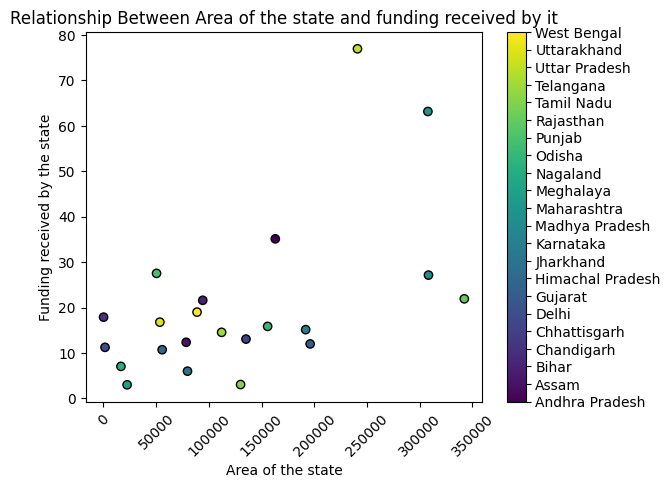

In [31]:
# Create a scatter plot to showcase the area versus funding received by a state. 
# Mark every state with a different color and show the legend outside the plot.
df_f_new = df_f.groupby("state")["Total fund released"].sum().reset_index()
final_df = pd.merge(df_f_new, df_p, on="state" , how = "inner")
scatter = plt.scatter(final_df["Area (km2)"], final_df["Total fund released"], c=range(len(final_df)), cmap="viridis", edgecolors="black")
plt.xlabel("Area of the state")
plt.ylabel("Funding received by the state")
plt.title("Relationship Between Area of the state and funding received by it")
cbar = plt.colorbar(scatter)
cbar.set_ticks(range(len(final_df["state"])))
cbar.set_ticklabels(final_df["state"])
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# Miscellaneous Questions

In [32]:
# For the most polluted city in 2023 (highest average pollution in 2023), 
# calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)
df_new = df[df["Date"].dt.year == 2023].copy()
most_polluted = df_new.groupby("city")["PM2.5"].mean().idxmax()
df_polluted = df_new[df_new["city"] == most_polluted].copy()
df_polluted["Threshold"] = df_polluted["PM2.5"]>300
print("Percentage of days with PM2.5 levels above the hazardous threshold for", most_polluted , "is" , df_polluted["Threshold"].sum()/len(df_polluted)*100)

Percentage of days with PM2.5 levels above the hazardous threshold for Darbhanga is 0.821917808219178


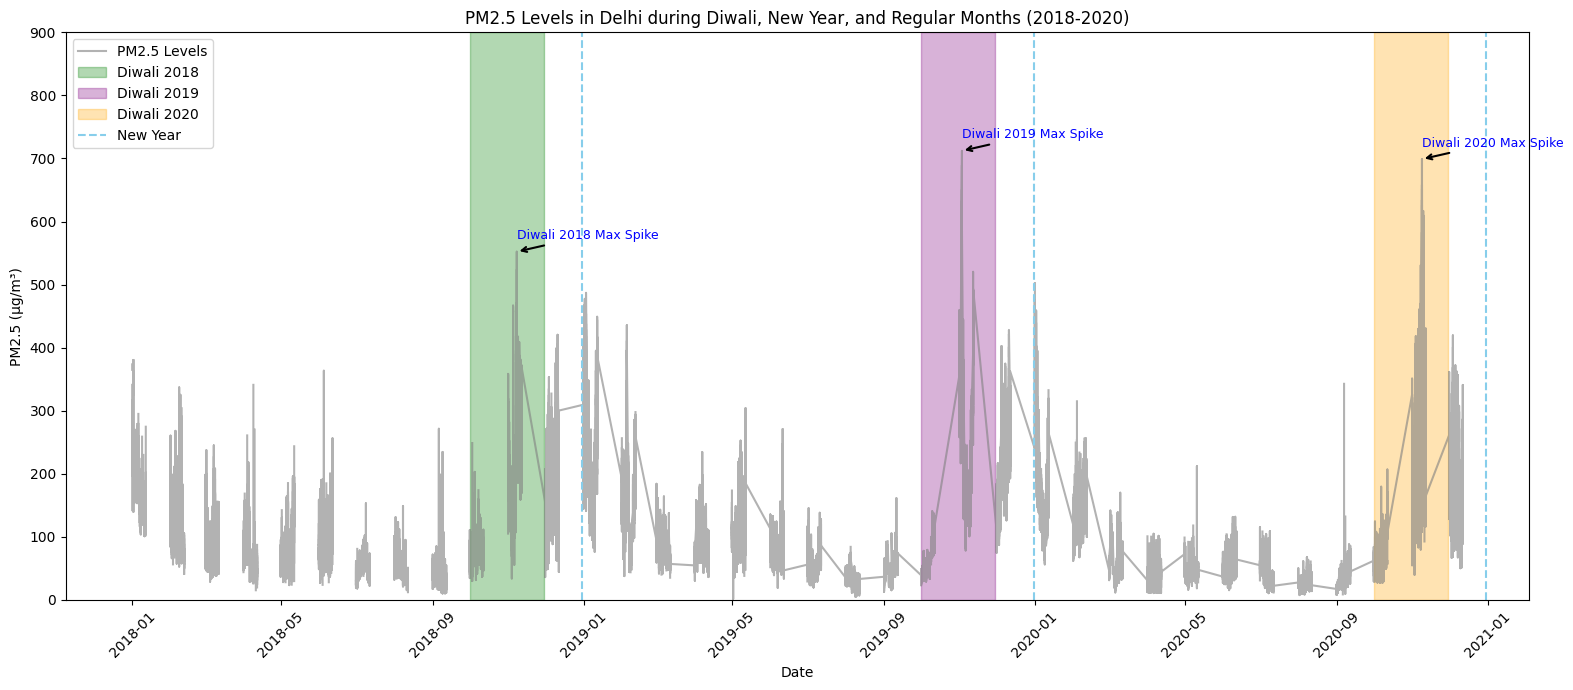

In [33]:
# Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). 
# Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d')
delhi_data = df[(data['city'] == 'Delhi') & (data['Timestamp'].dt.year.isin([2018, 2019, 2020]))]
new_year_dates = pd.to_datetime(['2018-12-31', '2019-12-31', '2020-12-31'])  # New Year dates
new_year_data = delhi_data[delhi_data['Timestamp'].isin(new_year_dates)]
diwali_data = delhi_data[delhi_data['Timestamp'].dt.month.isin([10, 11])]

plt.figure(figsize=(16,7))
plt.plot(delhi_data['Timestamp'], delhi_data['PM2.5'], label='PM2.5 Levels', color='gray', alpha=0.6)

diwali_years = [2018, 2019, 2020]
diwali_colors = ['green', 'purple', 'orange'] 
for i, year in enumerate(diwali_years):
    plt.axvspan(f'{year}-10-01', f'{year}-11-30', color=diwali_colors[i], alpha=0.3, label=f'Diwali {year}' "")
for year in new_year_dates.year:
    plt.axvline(pd.to_datetime(f'{year}-12-31'), color='skyblue', linestyle='--', label=f'New Year' if year == new_year_dates.year[0] else "")
for year in diwali_years:
    diwali_period = delhi_data[(delhi_data['Timestamp'].dt.year == year) & (delhi_data['Timestamp'].dt.month.isin([10, 11]))]
    top_spike = diwali_period.loc[diwali_period['PM2.5'].idxmax()]  #topmost spike for Diwali
    plt.annotate(f'Diwali {year} Max Spike', 
                 xy=(top_spike['Timestamp'], top_spike['PM2.5']), 
                 xytext=(top_spike['Timestamp'], top_spike['PM2.5'] + 20), 
                 arrowprops=dict(facecolor='blue', arrowstyle='->', lw=1.5),
                 fontsize=9, color='blue')

plt.title('PM2.5 Levels in Delhi during Diwali, New Year, and Regular Months (2018-2020)')
plt.xlabel('Date')
plt.ylabel('PM2.5 (µg/m³)')
plt.ylim(0, 900)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Assam received the highest NCAP funding in 2020.


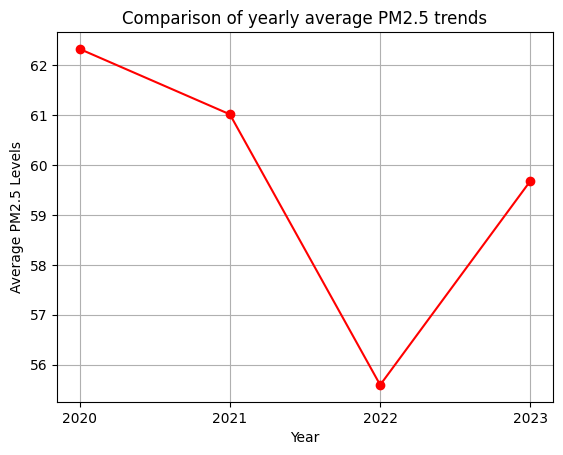

In [34]:
# Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023.
# Use a line graph to compare yearly average PM2.5 trends
highest_NCP = df_f.groupby("state")["Amount released during FY 2020-21"].sum().idxmax()
print(highest_NCP , "received the highest NCAP funding in 2020.")
df_new = df.copy()
df_new["Year"] = df_new["Date"].dt.year
df_new = df_new[( df_new["Year"].between(2020,2023)) & (df_new["state"]==highest_NCP)]
df_state = df_new.groupby("Year")["PM2.5"].mean()
plt.plot(df_state.index, df_state, marker='o', color='red')
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels")
plt.title("Comparison of yearly average PM2.5 trends")
plt.xticks([2020,2021,2022,2023])
plt.grid(True)
plt.show()

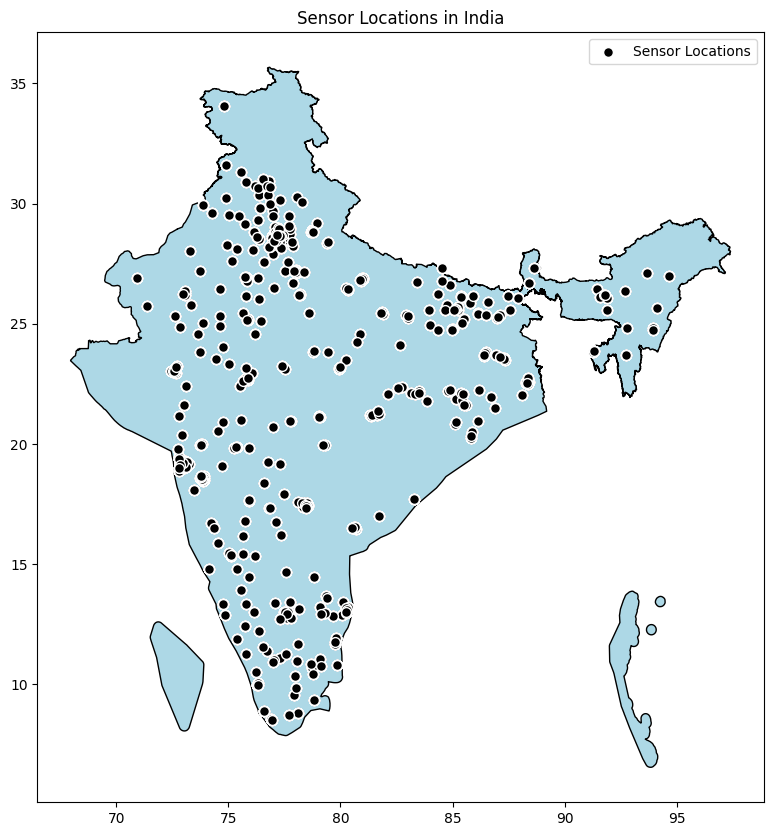

In [35]:
# Draw the map of India and plot the sensor locations on the map
import geopandas as gpd
import osmnx as ox

india=ox.geocode_to_gdf("India")
sensor_locations=df[['latitude', 'longitude', 'station']]

fig, ax=plt.subplots(figsize=(10, 10))
india.plot(ax=ax, color='lightblue', edgecolor='black')
ax.scatter(sensor_locations['longitude'], sensor_locations['latitude'], 
           color='black', marker='o', s=50, edgecolors='white', label='Sensor Locations')
ax.set_title('Sensor Locations in India')
ax.legend()
plt.show()

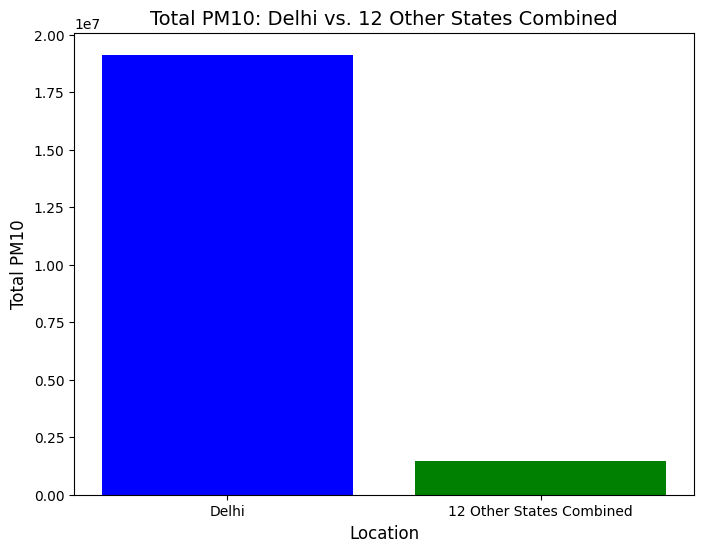

This is an example of how graphs can be misused to mislead the public
From the graph we might conclude that pollution in Delhi is much more than 12 other states combined.
However this is just because Delhi has such a high density of monitoring stations.


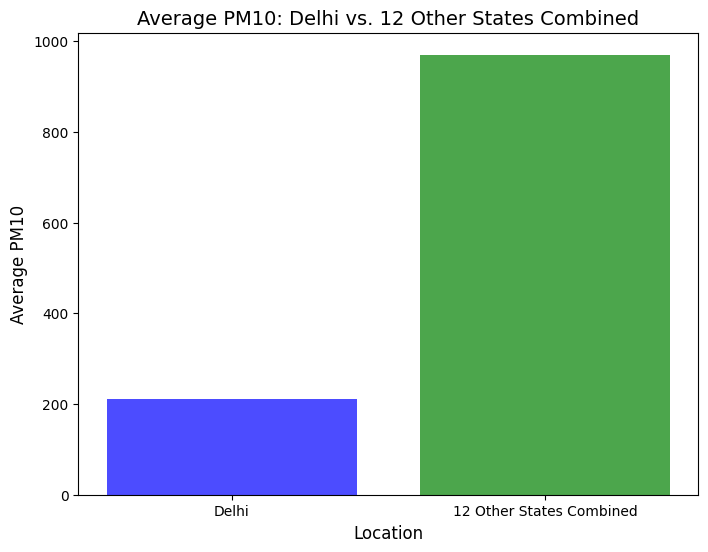

This graph shows the less misleading info that Delhi is not more polluted than 12 states combined
The policy makers should be advised not to fall for such traps by data analysts and conduct their own surveys, not depending on third party sources for pollution information


In [36]:
# Tell us something new
import matplotlib.pyplot as plt
new_states=['Sikkim','Arunachal Pradesh','Manipur','Chandigarh','Mizoram','Puducherry','Meghalaya','Jammu and Kashmir','Nagaland','Himachal Pradesh','Tripura ','Jharkhand']
delhi_data=data[data['state'] == 'Delhi']
new_states_data=data[data['state'].isin(new_states)]
delhi_pm10_total=delhi_data['PM10'].sum()
new_states_pm10_total=new_states_data['PM10'].sum()

pollution_comparison = pd.DataFrame({
    'Location': ['Delhi', '12 Other States Combined'],
    'Total PM10': [delhi_pm10_total, new_states_pm10_total]
})


plt.figure(figsize=(8, 6))
plt.bar(pollution_comparison['Location'], pollution_comparison['Total PM10'], color=['blue', 'green'])
plt.title('Total PM10: Delhi vs. 12 Other States Combined', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Total PM10', fontsize=12)
plt.show()

print("This is an example of how graphs can be misused to mislead the public\nFrom the graph we might conclude that pollution in Delhi is much more than 12 other states combined.\nHowever this is just because Delhi has such a high density of monitoring stations.")
delhi_pm10_avg=delhi_data['PM10'].mean()
new_states_pm10_avg=new_states_data['PM10'].mean()
avg_pollution_comparison = pd.DataFrame({
    'Location': ['Delhi', '12 Other States Combined'],
    'Average PM10': [delhi_pm10_avg, new_states_pm10_avg*12]
})

plt.figure(figsize=(8, 6))
plt.bar(avg_pollution_comparison['Location'], avg_pollution_comparison['Average PM10'], color=['blue', 'green'],alpha=0.7)
plt.title('Average PM10: Delhi vs. 12 Other States Combined', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Average PM10', fontsize=12)
plt.show()
print("This graph shows the less misleading info that Delhi is not more polluted than 12 states combined")
print("The policy makers should be advised not to fall for such traps by data analysts and conduct their own surveys, not depending on third party sources for pollution information")